Generate 1000 points coming from two different gaussian distributions, centered in (1,1) and (-1, -1).

Display them on a scatter plot, with one color for each gaussian.


Use :
- torch.randn
- pyplot.scatter

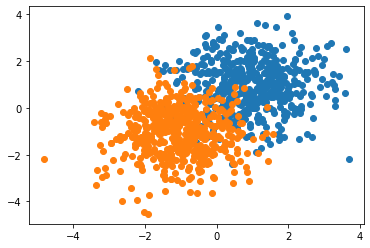

In [17]:
import torch

meanA, meanB = torch.FloatTensor([1, 1]), torch.FloatTensor([-1, -1]) 
dataA = torch.randn(500, 2) + meanA
dataB = torch.randn(500, 2) + meanB

from matplotlib import pyplot as plt

plt.figure()
plt.scatter(dataA.numpy()[:, 0], dataA.numpy()[:, 1])
plt.scatter(dataB.numpy()[:, 0], dataB.numpy()[:, 1])
plt.show()

Shuffle the data. Select 75% of for the train set and leave the other 25% for the valid set.

Use :
- torch.randperm

In [18]:
perm = torch.randperm(len(dataA) + len(dataB))
classes = [0] * len(dataA) + [1] * len(dataB)
all_data = torch.cat([dataA,dataB])[perm]
classes = torch.FloatTensor([classes[x] for x in perm])
n_train = int(len(all_data) * 0.75)
train, test = all_data[:n_train], all_data[n_train:]
train_tgt, test_tgt = classes[:n_train], classes[n_train:]

Create a linear model to classify the data, and an SGD optimizer.
Train the model with a BCEWithLogitsLoss until convergence

Use :
- torch.nn.Linear
- torch.optim.SGD
- torch.nn.BCEWithLogitsLoss

In [19]:
from torch import nn
from torch.optim import SGD
model = nn.Linear(2, 1)
optimizer = SGD(model.parameters(), lr=1)

In [20]:

crit = nn.BCEWithLogitsLoss()
for e in range(10):
  loss = crit(model(train).squeeze(), train_tgt)
  model.zero_grad()
  loss.backward()
  optimizer.step()
  print(loss.item())


0.8795709609985352
0.44909536838531494
0.3421287536621094
0.2948266267776489
0.2677991986274719
0.2502615451812744
0.23798014223575592
0.22892655432224274
0.2219991385936737
0.2165459245443344


In [21]:
train_tgt.shape
model(train).squeeze().shape

torch.Size([750])

Use your trained model to classify the test data. Plot the result.

Use :
- torch.nn.functional.sigmoid
- pyplot.scatter

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


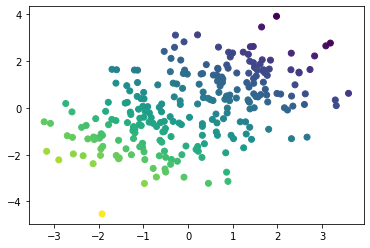

In [22]:
from torch.nn import functional as F
model_out = model(test).squeeze().detach()
sigmoids = F.sigmoid(model_out)
pos = sigmoids > 0.5

plt.figure()
# plt.scatter(test[pos, 0], test[pos, 1])
# plt.scatter(test[~pos, 0], test[~pos, 1])
plt.scatter(test[:, 0], test[:, 1], c=model_out)
plt.show()


In [34]:
mat=torch.ones(8,8).reshape(2,8,4)
mat


tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [45]:
mat.view(-1,1,4).shape

torch.Size([16, 1, 4])

In [55]:
mat.flatten(0).shape

torch.Size([64])